In [68]:
import os
os.chdir('/home/jovyan/work/src')
import reading
import numpy as np
import math
import pandas as pd
import do_charts_vast
from star_description import StarDescription
from astropy.coordinates import SkyCoord
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
np.random.seed(42)
t_np = np.random.uniform(2456810, 2456820, 10)
print("t_np", t_np)
y_np = np.random.uniform(10, 11, 10)
dy_np = np.random.uniform(0.01, 0.1, 10)
epoch = 2456815.98658484
zeroed_t = np.around(t_np - epoch, 6)
print("zeroed", zeroed_t)
divided_t = zeroed_t / 0.2
print("divided", divided_t)
phased_t = np.fmod(divided_t, 1)
print("phased",phased_t)
phased_lc = y_np[:]




t_np [2456813.74540119 2456819.50714306 2456817.31993942 2456815.98658484
 2456811.5601864  2456811.5599452  2456810.58083612 2456818.66176146
 2456816.01115012 2456817.08072578]
zeroed [-2.241184  3.520558  1.333355  0.       -4.426398 -4.42664  -5.405749
  2.675177  0.024565  1.094141]
divided [-11.20592   17.60279    6.666775   0.       -22.13199  -22.1332
 -27.028745  13.375885   0.122825   5.470705]
phased [-0.20592   0.60279   0.666775  0.       -0.13199  -0.1332   -0.028745
  0.375885  0.122825  0.470705]


In [3]:
series = pd.Series(phased_t)

In [4]:
t_epoch_location = np.where(np.isclose(t_np, epoch))
print(t_epoch_location)
print(f"Epoch location is {t_epoch_location} with value {t_np[t_epoch_location]} equal to {epoch}")
phase_zero_value = phased_t[t_epoch_location]
phased_t_target = phased_t[t_epoch_location]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)
Epoch location is (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),) with value [2456813.74540119 2456819.50714306 2456817.31993942 2456815.98658484
 2456811.5601864  2456811.5599452  2456810.58083612 2456818.66176146
 2456816.01115012 2456817.08072578] equal to 2456815.98658484


In [5]:
print(phased_t, "\n", t_np)

[-0.20592   0.60279   0.666775  0.       -0.13199  -0.1332   -0.028745
  0.375885  0.122825  0.470705] 
 [2456813.74540119 2456819.50714306 2456817.31993942 2456815.98658484
 2456811.5601864  2456811.5599452  2456810.58083612 2456818.66176146
 2456816.01115012 2456817.08072578]


In [6]:
np.isclose(epoch, t_np)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [7]:
np.abs(t_np - epoch)

array([2.24118365e+00, 3.52055822e+00, 1.33335458e+00, 1.86264515e-09,
       4.42639844e+00, 4.42663964e+00, 5.40574872e+00, 2.67517662e+00,
       2.45652776e-02, 1.09414094e+00])

In [8]:
print(phased_t)
print(np.argsort(phased_t))

[-0.20592   0.60279   0.666775  0.       -0.13199  -0.1332   -0.028745
  0.375885  0.122825  0.470705]
[0 5 4 6 3 8 7 9 1 2]


In [9]:
bla = phased_t - 0.93292421

In [10]:
print(bla)
print(np.argsort(bla))
bla % 1

[-1.13884421 -0.33013421 -0.26614921 -0.93292421 -1.06491421 -1.06612421
 -0.96166921 -0.55703921 -0.81009921 -0.46221921]
[0 5 4 6 3 8 7 9 1 2]


array([0.86115579, 0.66986579, 0.73385079, 0.06707579, 0.93508579,
       0.93387579, 0.03833079, 0.44296079, 0.18990079, 0.53778079])

In [11]:
0 % 1

0

Testing modulo maths with negative numbers

In [12]:
def modit(arr, period):
    print("incoming array:", arr)
    print("arr / period: ", arr/period)
    b = np.mod(arr/period, 1)
    print("result of mod: ", b)
    print("argsort: ", np.argsort(b))
    print("--------------------------------")

In [13]:
a = np.array([1.0, 3.0, 13.5, 100.3])
modit(a, 3)
c = a - 13.5
modit(c, 3)

incoming array: [  1.    3.   13.5 100.3]
arr / period:  [ 0.33333333  1.          4.5        33.43333333]
result of mod:  [0.33333333 0.         0.5        0.43333333]
argsort:  [1 0 3 2]
--------------------------------
incoming array: [-12.5 -10.5   0.   86.8]
arr / period:  [-4.16666667 -3.5         0.         28.93333333]
result of mod:  [0.83333333 0.5        0.         0.93333333]
argsort:  [2 1 0 3]
--------------------------------


In [14]:
print(os.getcwd())
df = reading.read_lightcurve_vast("../inputfiles/ASASSN-V_J060000.76-310027.83/vast/2019_1_bestaper/out00174.dat")

/home/jovyan/work/src


-12.53128295
               JD       Vrel     err          X        Y  unknown  \
32  2458836.72571 -12.531283  0.0031  700.75842  99.9002      6.7   

                                                 file      realV  realErr  \
32  ../data/ASASSN-V_J060000.76-310027.83/cleaned/... -12.531283   0.0031   

         floatJD  
32  2.458837e+06  
the where result is  32 epoch is 2458836.72571 <class 'str'>
zero value: [-12.53128295]
0      0.578943
1      0.272600
2      0.716327
3      0.729107
4      0.142021
         ...   
730    0.757062
731    0.001111
732    0.014241
733    0.303645
734    0.316600
Name: floatJD, Length: 735, dtype: float64
[-12.62006096 -12.57358425 -12.58381897 ... -12.54731003 -12.58120032
 -12.59313881]


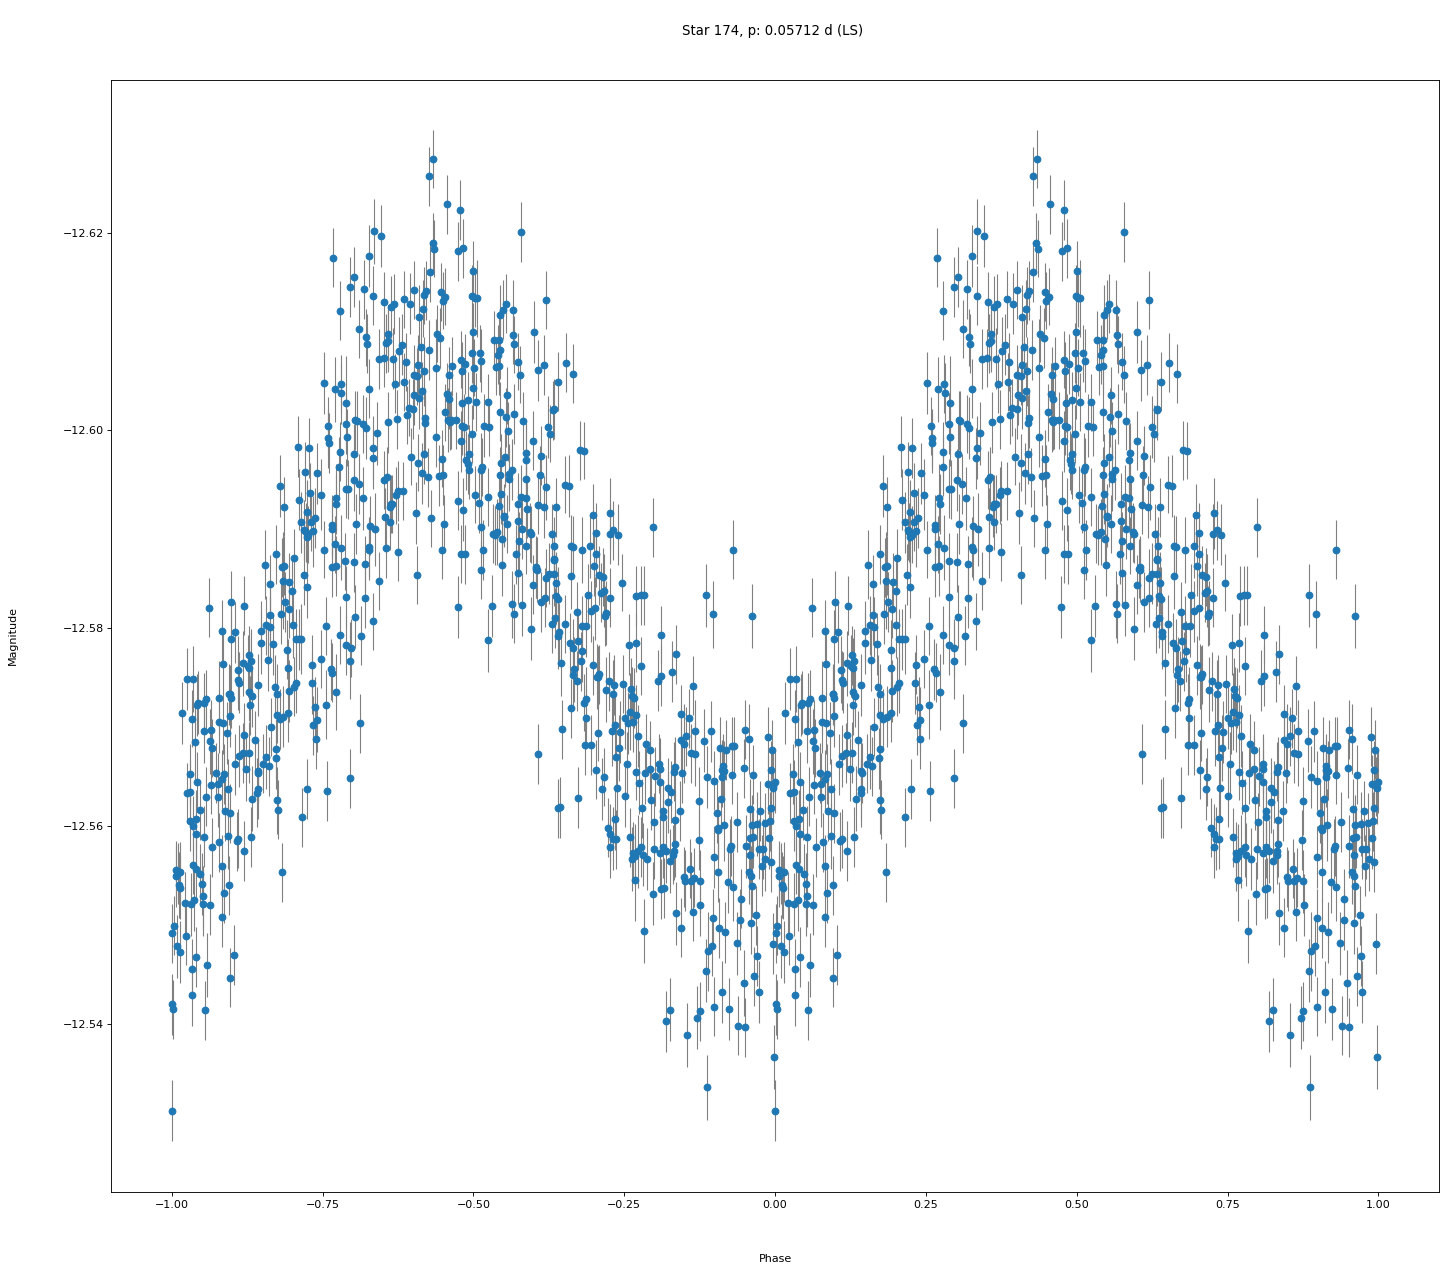

In [78]:
df['realV'], df['realErr'] = df['Vrel'], df['err']
df['floatJD'] = df['JD'].astype(np.float)
#df.plot(x='floatJD', y='realV', kind='scatter', logx=False, figsize=(20,10), use_index=False)
star = StarDescription(local_id=174, coords=SkyCoord(ra=5.6, dec=-72, unit='deg'))
period = do_charts_vast.calculate_ls_period_from_df(df)
print(df['Vrel'].max())
print(df[df['Vrel'] == df['Vrel'].max()])
plt, t, lc = do_charts_vast.plot_phase_diagram(star, df, "bla", write_plot=False, period=period, epoch='2458836.72571')
plt.show()


In [77]:
plt_result, t_np, y_np = do_charts_vast.plot_phase_diagram(star, df.copy(), phasedir, period=period, epoch=epoch, suffix="", write_plot=False)

NameError: name 'phasedir' is not defined

In [27]:
np.isclose([1,2,2458836.02572], 2458836.72571)

array([False, False,  True])

In [40]:
#absolute(a - b) <= (atol + rtol * absolute(b))
a = 2458836.72571
#b = 2458836.72571 - 0.000011574
b = 2458836.72571 - 2*0.000011574
absol = abs(a - b)
atol = 1e-08
rtol = 1e-12
print(absol, atol, rtol, (atol + rtol * abs(b)))
print("isclose", np.isclose(b, a, atol=atol, rtol=rtol))

2.314802259206772e-05 1e-08 1e-12 2.468836725686852e-06
isclose False


In [32]:
(0.000011574-atol)/abs(b)

4.703036960176881e-12

In [64]:
bla = np.array(["1234", "1234.3"])
np.where(bla == "1234.3")[0][0]

1